In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX


import warnings
warnings.filterwarnings("ignore")

file_path = "C:/Users/vpotla/Downloads/Month_Value_1.csv"
data = pd.read_csv(file_path)

In [3]:
#преобразование столбца 'Period' в формат datetime
data['Period'] = pd.to_datetime(data['Period'], format='%d.%m.%Y')

data.set_index('Period', inplace=True)

In [4]:
average_cost = data['Average_cost']

In [5]:
average_cost = average_cost.dropna()

print(f"Количество пропусков в Average_cost: {average_cost.isnull().sum()}")

Количество пропусков в Average_cost: 0


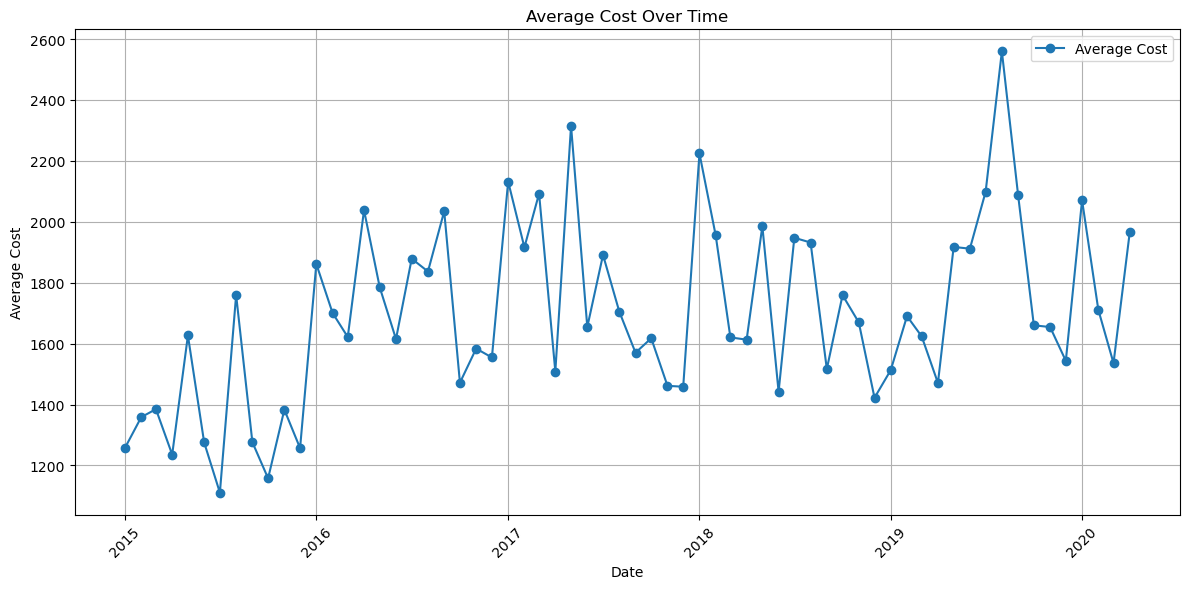

In [6]:
plt.figure(figsize=(12, 6))
plt.plot(average_cost, marker='o', label='Average Cost')
plt.title('Average Cost Over Time')
plt.xlabel('Date')
plt.ylabel('Average Cost')
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

                                    SARIMAX Results                                     
Dep. Variable:                     Average_cost   No. Observations:                   64
Model:             ARIMA(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -359.209
Date:                          Wed, 20 Aug 2025   AIC                            728.419
Time:                                  19:33:01   BIC                            738.078
Sample:                              01-01-2015   HQIC                           732.110
                                   - 04-01-2020                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0095      0.242     -0.039      0.969      -0.483       0.464
ma.L1         -0.6861      0.198     -3.472      0.

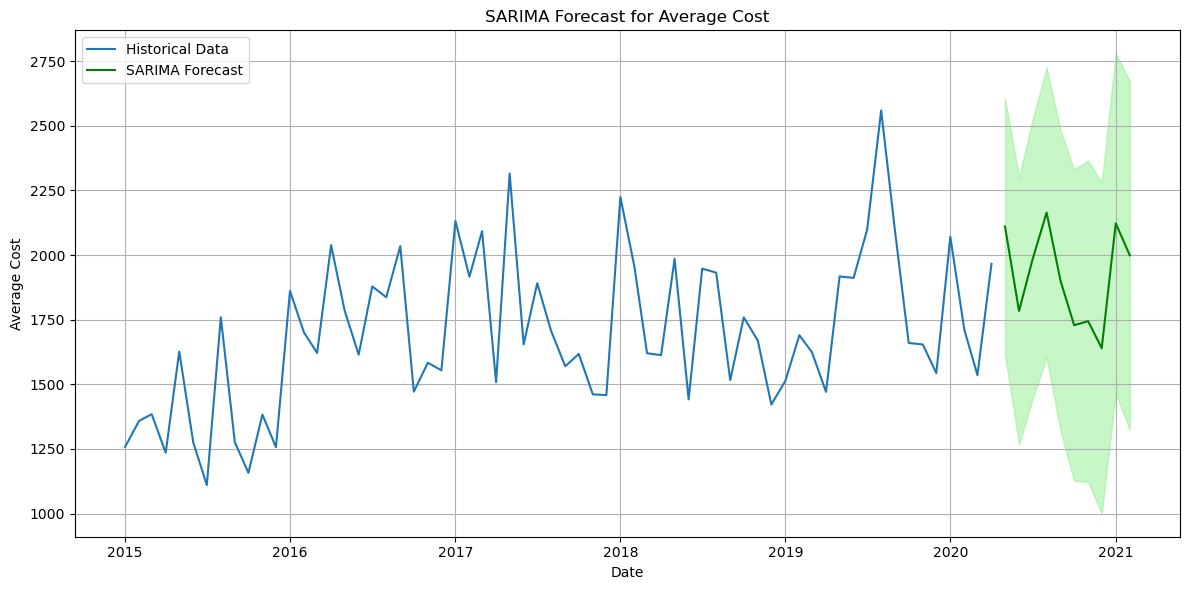

In [7]:
arima_model = ARIMA(average_cost, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
arima_result = arima_model.fit()
print(arima_result.summary())

#прогноз SARIMA
forecast_horizon = 10
arima_forecast = arima_result.get_forecast(steps=forecast_horizon)
arima_pred = arima_forecast.predicted_mean
arima_ci = arima_forecast.conf_int()

plt.figure(figsize=(12, 6))
plt.plot(average_cost, label='Historical Data')
plt.plot(arima_pred.index, arima_pred, label='SARIMA Forecast', color='green')
plt.fill_between(arima_ci.index, arima_ci.iloc[:, 0], arima_ci.iloc[:, 1], color='lightgreen', alpha=0.5)
plt.title('SARIMA Forecast for Average Cost')
plt.xlabel('Date')
plt.ylabel('Average Cost')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [8]:
import pickle
# after training:
with open('model.pkl', 'wb') as f:
    pickle.dump(arima_result, f)
